# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 609


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?appid=" + weather_api_key + "&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | vorkuta
Processing Record 2 of Set 1 | shima
Processing Record 3 of Set 1 | waitangi
Processing Record 4 of Set 1 | adamstown
Processing Record 5 of Set 1 | puerto ayora
Processing Record 6 of Set 1 | albany
Processing Record 7 of Set 1 | orerokpe
Processing Record 8 of Set 1 | nalut
Processing Record 9 of Set 1 | port augusta
Processing Record 10 of Set 1 | port mathurin
Processing Record 11 of Set 1 | tolanaro
Processing Record 12 of Set 1 | sungai penuh
Processing Record 13 of Set 1 | lebu
Processing Record 14 of Set 1 | yellowknife
Processing Record 15 of Set 1 | grytviken
Processing Record 16 of Set 1 | la passe
Processing Record 17 of Set 1 | talnakh
Processing Record 18 of Set 1 | sola
Processing Record 19 of Set 1 | bredasdorp
Processing Record 20 of Set 1 | minas de marcona
Processing Record 21 of Set 1 | margaret river
Processing Record 22 of Set 1 | mahibadhoo
Processing Record 23 of S

Processing Record 40 of Set 4 | namibe
Processing Record 41 of Set 4 | smithers
Processing Record 42 of Set 4 | dhana
Processing Record 43 of Set 4 | altus
Processing Record 44 of Set 4 | inari
Processing Record 45 of Set 4 | labrador city
Processing Record 46 of Set 4 | chos malal
Processing Record 47 of Set 4 | enewetak
Processing Record 48 of Set 4 | kwang binh
Processing Record 49 of Set 4 | severo-yeniseyskiy
Processing Record 0 of Set 5 | lesnoy
Processing Record 1 of Set 5 | sandakan
Processing Record 2 of Set 5 | undurkhaan
Processing Record 3 of Set 5 | zhytkavichy
Processing Record 4 of Set 5 | xiazhuang
Processing Record 5 of Set 5 | luanda
Processing Record 6 of Set 5 | lumphat
Processing Record 7 of Set 5 | broome
Processing Record 8 of Set 5 | homestead meadows north
Processing Record 9 of Set 5 | ridder
Processing Record 10 of Set 5 | bals
Processing Record 11 of Set 5 | remire-montjoly
Processing Record 12 of Set 5 | chapaev
Processing Record 13 of Set 5 | balakhta
Proc

Processing Record 31 of Set 8 | cambria
Processing Record 32 of Set 8 | young
Processing Record 33 of Set 8 | calvinia
Processing Record 34 of Set 8 | ascension
Processing Record 35 of Set 8 | fuling
Processing Record 36 of Set 8 | lazaro cardenas
Processing Record 37 of Set 8 | galle
Processing Record 38 of Set 8 | atherton
Processing Record 39 of Set 8 | huntsville
Processing Record 40 of Set 8 | tocache
Processing Record 41 of Set 8 | forster
Processing Record 42 of Set 8 | ecoporanga
Processing Record 43 of Set 8 | dunedin
Processing Record 44 of Set 8 | zalari
Processing Record 45 of Set 8 | inekar
City not found. Skipping...
Processing Record 46 of Set 8 | thunder bay
Processing Record 47 of Set 8 | iskateley
Processing Record 48 of Set 8 | salekhard
Processing Record 49 of Set 8 | tucuma
Processing Record 0 of Set 9 | uturoa
Processing Record 1 of Set 9 | arraial do cabo
Processing Record 2 of Set 9 | kislovodsk
Processing Record 3 of Set 9 | inyati
Processing Record 4 of Set 9 

Processing Record 22 of Set 12 | touros
Processing Record 23 of Set 12 | gaoual
Processing Record 24 of Set 12 | upper dir
Processing Record 25 of Set 12 | ciudad cerralvo
City not found. Skipping...
Processing Record 26 of Set 12 | bangassou
Processing Record 27 of Set 12 | mwinilunga
Processing Record 28 of Set 12 | siwa oasis
Processing Record 29 of Set 12 | sapri
Processing Record 30 of Set 12 | kijang
Processing Record 31 of Set 12 | yanaul
Processing Record 32 of Set 12 | belmonte
Processing Record 33 of Set 12 | arkhara
Processing Record 34 of Set 12 | centerville
Processing Record 35 of Set 12 | tupaciguara
Processing Record 36 of Set 12 | chulakkurgan
Processing Record 37 of Set 12 | bambanglipuro
Processing Record 38 of Set 12 | gilgit
Processing Record 39 of Set 12 | kalmunai
Processing Record 40 of Set 12 | happy valley-goose bay
Processing Record 41 of Set 12 | znamensk
Processing Record 42 of Set 12 | vrapciste
Processing Record 43 of Set 12 | port moresby
Processing Reco

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          583
Lat           583
Lng           583
Max Temp      583
Humidity      583
Cloudiness    583
Wind Speed    583
Country       583
Date          583
dtype: int64

In [10]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,vorkuta,67.5000,64.0000,266.78,93,59,6.54,RU,1682639874
1,shima,24.4478,117.8111,293.16,74,10,0.35,CN,1682639938
2,waitangi,-43.9535,-176.5597,286.38,78,96,1.34,NZ,1682639798
3,adamstown,-25.0660,-130.1015,297.10,66,96,2.57,PN,1682639868
4,puerto ayora,-0.7393,-90.3518,300.12,89,70,2.24,EC,1682639876


In [14]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [15]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,vorkuta,67.5000,64.0000,266.78,93,59,6.54,RU,1682639874
1,shima,24.4478,117.8111,293.16,74,10,0.35,CN,1682639938
2,waitangi,-43.9535,-176.5597,286.38,78,96,1.34,NZ,1682639798
3,adamstown,-25.0660,-130.1015,297.10,66,96,2.57,PN,1682639868
4,puerto ayora,-0.7393,-90.3518,300.12,89,70,2.24,EC,1682639876


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

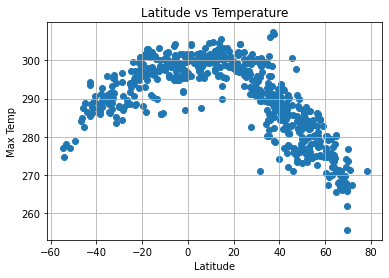

In [18]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"])

# Incorporate the other graph properties
plt.title("Latitude vs Temperature")
plt.ylabel("Max Temp")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

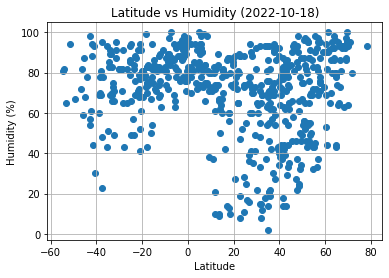

In [19]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"])

# Incorporate the other graph properties
plt.title("Latitude vs Humidity (2022-10-18)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

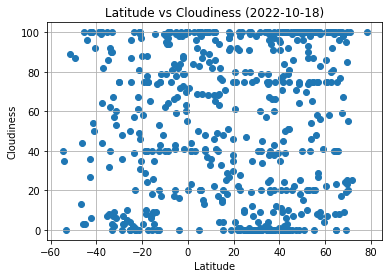

In [21]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"])


# Incorporate the other graph properties
plt.title("Latitude vs Cloudiness (2022-10-18)")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

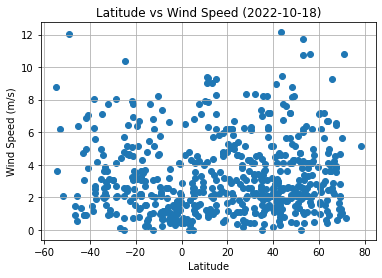

In [22]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"])


# Incorporate the other graph properties
plt.title("Latitude vs Wind Speed (2022-10-18)")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [62]:
# Define a function to create Linear Regression plots



In [24]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[(city_data_df["Lat"] >=0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,vorkuta,67.5000,64.0000,266.78,93,59,6.54,RU,1682639874
1,shima,24.4478,117.8111,293.16,74,10,0.35,CN,1682639938
5,albany,42.6001,-73.9662,285.31,56,39,0.55,US,1682639871
6,orerokpe,5.6351,5.8896,296.03,92,100,1.22,NG,1682639939
7,nalut,30.3333,10.8500,295.86,22,0,6.32,LY,1682639939


In [26]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[(city_data_df["Lat"] <=0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,waitangi,-43.9535,-176.5597,286.38,78,96,1.34,NZ,1682639798
3,adamstown,-25.0660,-130.1015,297.10,66,96,2.57,PN,1682639868
4,puerto ayora,-0.7393,-90.3518,300.12,89,70,2.24,EC,1682639876
8,port augusta,-32.5000,137.7667,291.49,66,57,3.61,AU,1682639939
9,port mathurin,-19.6833,63.4167,299.00,81,58,6.41,MU,1682639891


###  Temperature vs. Latitude Linear Regression Plot

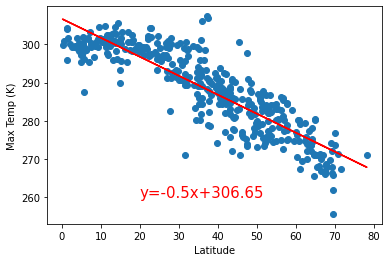

The r-value is: 0.7615538551091955


In [36]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept 

#line equation 
line_eq = "y=" + str(round(slope,2)) + "x+" + str(round(intercept,2))


# Plot
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(20,260),fontsize=15,color="red")
plt.ylabel ("Max Temp (K)")
plt.xlabel("Latitude")
plt.show()
print(f"The r-value is: {rvalue**2}")

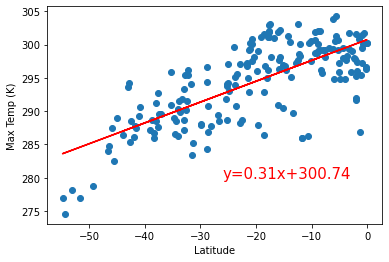

The r-value is: 0.5301071539462735


In [63]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept 

#line equation 
line_eq = "y=" + str(round(slope,2)) + "x+" + str(round(intercept,2))


# Plot
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(-26,280),fontsize=15,color="red")
plt.ylabel ("Max Temp (K)")
plt.xlabel("Latitude")
plt.show()
print(f"The r-value is: {rvalue**2}")

**Discussion about the linear relationship:** The Northern Hemisphere Temp. v Lat. relationship is negative, so as latitude increases, the max temp decreases. This makes a lot of sense as temperatures further north from the equator naturally means less sun intensity making it colder. The Southern Hemispsher Temp. v Lat. has the opposite relationship for the same reasons. Based on the r-squared values of each graph, the Northern Hemisphere data is better represented by the linear regression equation than the Southern Hemisphere's equation.

### Humidity vs. Latitude Linear Regression Plot

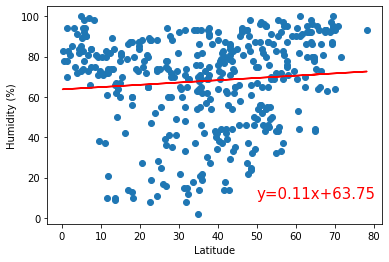

The r-value is: 0.008572352739548846


In [45]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept 

#line equation 
line_eq = "y=" + str(round(slope,2)) + "x+" + str(round(intercept,2))

#line equation 
line_eq = "y=" + str(round(slope,2)) + "x+" + str(round(intercept,2))

# Plot
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(50,10),fontsize=15,color="red")
plt.ylabel ("Humidity (%)")
plt.xlabel("Latitude")
plt.show()
print(f"The r-value is: {rvalue**2}")

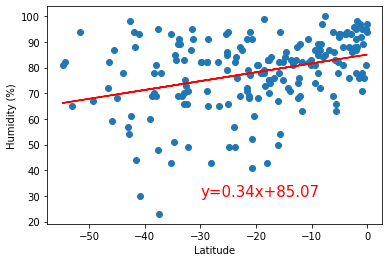

The r-value is: 0.11700556479492906


In [48]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept 

#line equation 
line_eq = "y=" + str(round(slope,2)) + "x+" + str(round(intercept,2))

#line equation 
line_eq = "y=" + str(round(slope,2)) + "x+" + str(round(intercept,2))

# Plot
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(-30,30),fontsize=15,color="red")
plt.ylabel ("Humidity (%)")
plt.xlabel("Latitude")
plt.show()
print(f"The r-value is: {rvalue**2}")

**Discussion about the linear relationship:** Both linear regression equations are positive meaning that in the Northern Hemisphere, as you move more north humidity increases, while in the Southern Hemisphere as you move more south, the humidity decreases. But from the low r-squared values with .12 being the higher value, the linear regression equation can at most represent the trends of about 12% of the Southern Hemisphere data with regards to predicting humidity %. 

### Cloudiness vs. Latitude Linear Regression Plot

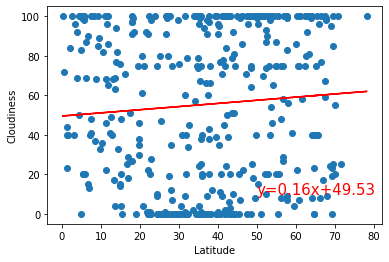

The r-value is: 0.006083103164279589


In [50]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept 

#line equation 
line_eq = "y=" + str(round(slope,2)) + "x+" + str(round(intercept,2))

#line equation 
line_eq = "y=" + str(round(slope,2)) + "x+" + str(round(intercept,2))

# Plot
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(50,10),fontsize=15,color="red")
plt.ylabel ("Cloudiness")
plt.xlabel("Latitude")
plt.show()
print(f"The r-value is: {rvalue**2}")

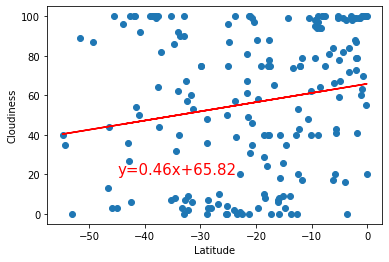

The r-value is: 0.03224358361103834


In [54]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept 

#line equation 
line_eq = "y=" + str(round(slope,2)) + "x+" + str(round(intercept,2))

#line equation 
line_eq = "y=" + str(round(slope,2)) + "x+" + str(round(intercept,2))

# Plot
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(-45,20),fontsize=15,color="red")
plt.ylabel ("Cloudiness")
plt.xlabel("Latitude")
plt.show()
print(f"The r-value is: {rvalue**2}")

**Discussion about the linear relationship:** In the Northern Hemisphere, the linear regression line suggests that as you move more north, cloudiness increases. While in the Southern Hemisphere, the linear regression line suggests that as you move more south, cloudiness decreases. Both r-squared values show that the linear regression lines do not represent the majority of the data so one should expect these relationships are unrelated.

### Wind Speed vs. Latitude Linear Regression Plot

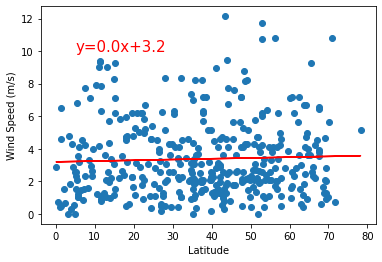

The r-value is: 0.0015203284830348687


In [58]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept 

#line equation 
line_eq = "y=" + str(round(slope,2)) + "x+" + str(round(intercept,2))

#line equation 
line_eq = "y=" + str(round(slope,2)) + "x+" + str(round(intercept,2))

# Plot
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(5,10),fontsize=15,color="red")
plt.ylabel ("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.show()
print(f"The r-value is: {rvalue**2}")

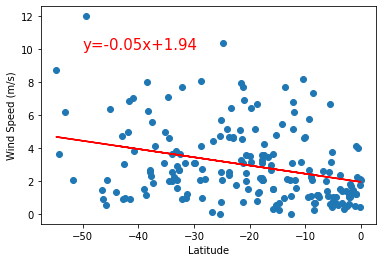

The r-value is: 0.09679885089898675


In [61]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept 

#line equation 
line_eq = "y=" + str(round(slope,2)) + "x+" + str(round(intercept,2))

#line equation 
line_eq = "y=" + str(round(slope,2)) + "x+" + str(round(intercept,2))

# Plot
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(-50,10),fontsize=15,color="red")
plt.ylabel ("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.show()
print(f"The r-value is: {rvalue**2}")

**Discussion about the linear relationship:** In the Northern Hemisphere, the linear regression line suggests that wind speed maybe marginally increases as you move more north. In the Southern Hemisphere, the linear regression line suggest that wind speed increases by 0.05 m/s per degree south you move. Again the r-squared values suggests there is not much in the latitude v. wind speed relationship with 9% being the most for data represented by the Southern Hemisphere linear regression equation.